# Gradient Descent Visualization: Linear Regression

This notebook demonstrates how **gradient descent** optimizes linear regression parameters through iterations. We'll visualize:

1. **Parameter evolution** - How weights and bias change over time
2. **Cost function surface** - The 3D landscape being optimized
3. **Regression line updates** - How the prediction line improves
4. **Loss convergence** - How the cost decreases with iterations

Understanding gradient descent is crucial for machine learning as it's the foundation of training most models.

Generated 20 data points
True parameters: weight=1.5, bias=0.5


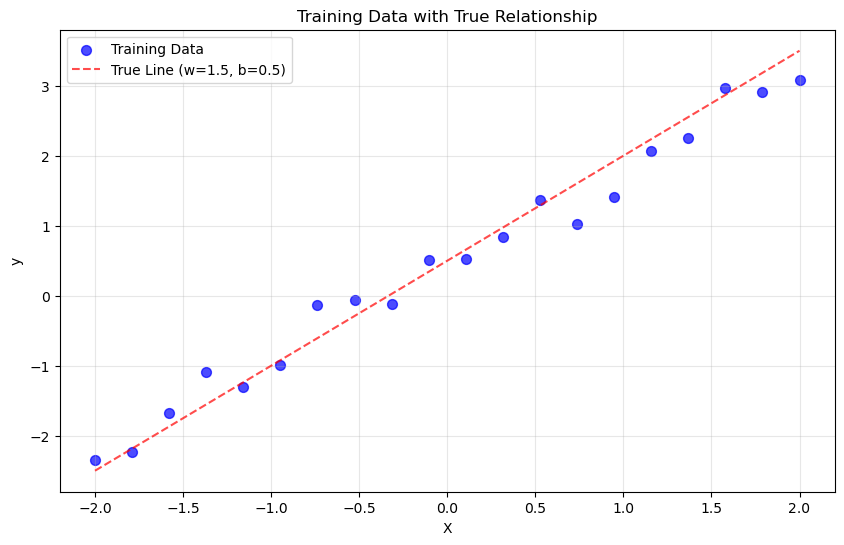

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Generate simple 2D data for linear regression
np.random.seed(42)
n_samples = 20
X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
true_weight = 1.5
true_bias = 0.5
noise_level = 0.3
y = true_weight * X.flatten() + true_bias + np.random.normal(0, noise_level, n_samples)

print(f"Generated {n_samples} data points")
print(f"True parameters: weight={true_weight}, bias={true_bias}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, s=50, color='blue', label='Training Data')
plt.plot(X, true_weight * X.flatten() + true_bias, 'r--', alpha=0.7, label=f'True Line (w={true_weight}, b={true_bias})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data with True Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
class LinearRegressionGradientDescent:
    """
    Linear regression with detailed gradient descent tracking for visualization.
    """
    def __init__(self, learning_rate=0.1, max_iterations=50):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
        # Track optimization progress
        self.weight_history = []
        self.bias_history = []
        self.cost_history = []
        self.gradient_history = []
        
    def fit(self, X, y, initial_weight=0.0, initial_bias=0.0):
        # Initialize parameters
        self.weight = initial_weight
        self.bias = initial_bias
        n_samples = len(X)
        
        # Store initial values
        self.weight_history = [self.weight]
        self.bias_history = [self.bias]
        
        print(f"Starting gradient descent...")
        print(f"Initial: weight={self.weight:.3f}, bias={self.bias:.3f}")
        
        # Gradient descent iterations
        for i in range(self.max_iterations):
            # Forward pass: make predictions
            y_pred = self.weight * X.flatten() + self.bias
            
            # Compute cost (MSE)
            cost = np.mean((y_pred - y) ** 2)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw = (2/n_samples) * np.sum((y_pred - y) * X.flatten())
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Store gradients
            self.gradient_history.append((dw, db))
            
            # Update parameters
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Store updated parameters
            self.weight_history.append(self.weight)
            self.bias_history.append(self.bias)
            
            # Print progress every 10 iterations
            if (i + 1) % 10 == 0:
                print(f"Iteration {i+1}: weight={self.weight:.3f}, bias={self.bias:.3f}, cost={cost:.3f}")
        
        final_cost = self.cost_history[-1]
        print(f"Final: weight={self.weight:.3f}, bias={self.bias:.3f}, cost={final_cost:.3f}")
        
    def predict(self, X):
        return self.weight * X.flatten() + self.bias
    
    def compute_cost_surface(self, X, y, weight_range, bias_range):
        """Compute cost function values over a grid for 3D visualization."""
        W, B = np.meshgrid(weight_range, bias_range)
        costs = np.zeros_like(W)
        
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                w, b = W[i, j], B[i, j]
                y_pred = w * X.flatten() + b
                costs[i, j] = np.mean((y_pred - y) ** 2)
        
        return W, B, costs

# Initialize and train the model
model = LinearRegressionGradientDescent(learning_rate=0.1, max_iterations=50)
model.fit(X, y, initial_weight=0.0, initial_bias=0.0)

Starting gradient descent...
Initial: weight=0.000, bias=0.000
Iteration 10: weight=1.317, bias=0.400, cost=0.058
Iteration 20: weight=1.357, bias=0.443, cost=0.049
Iteration 30: weight=1.358, bias=0.448, cost=0.049
Iteration 40: weight=1.358, bias=0.449, cost=0.049
Iteration 50: weight=1.358, bias=0.449, cost=0.049
Final: weight=1.358, bias=0.449, cost=0.049


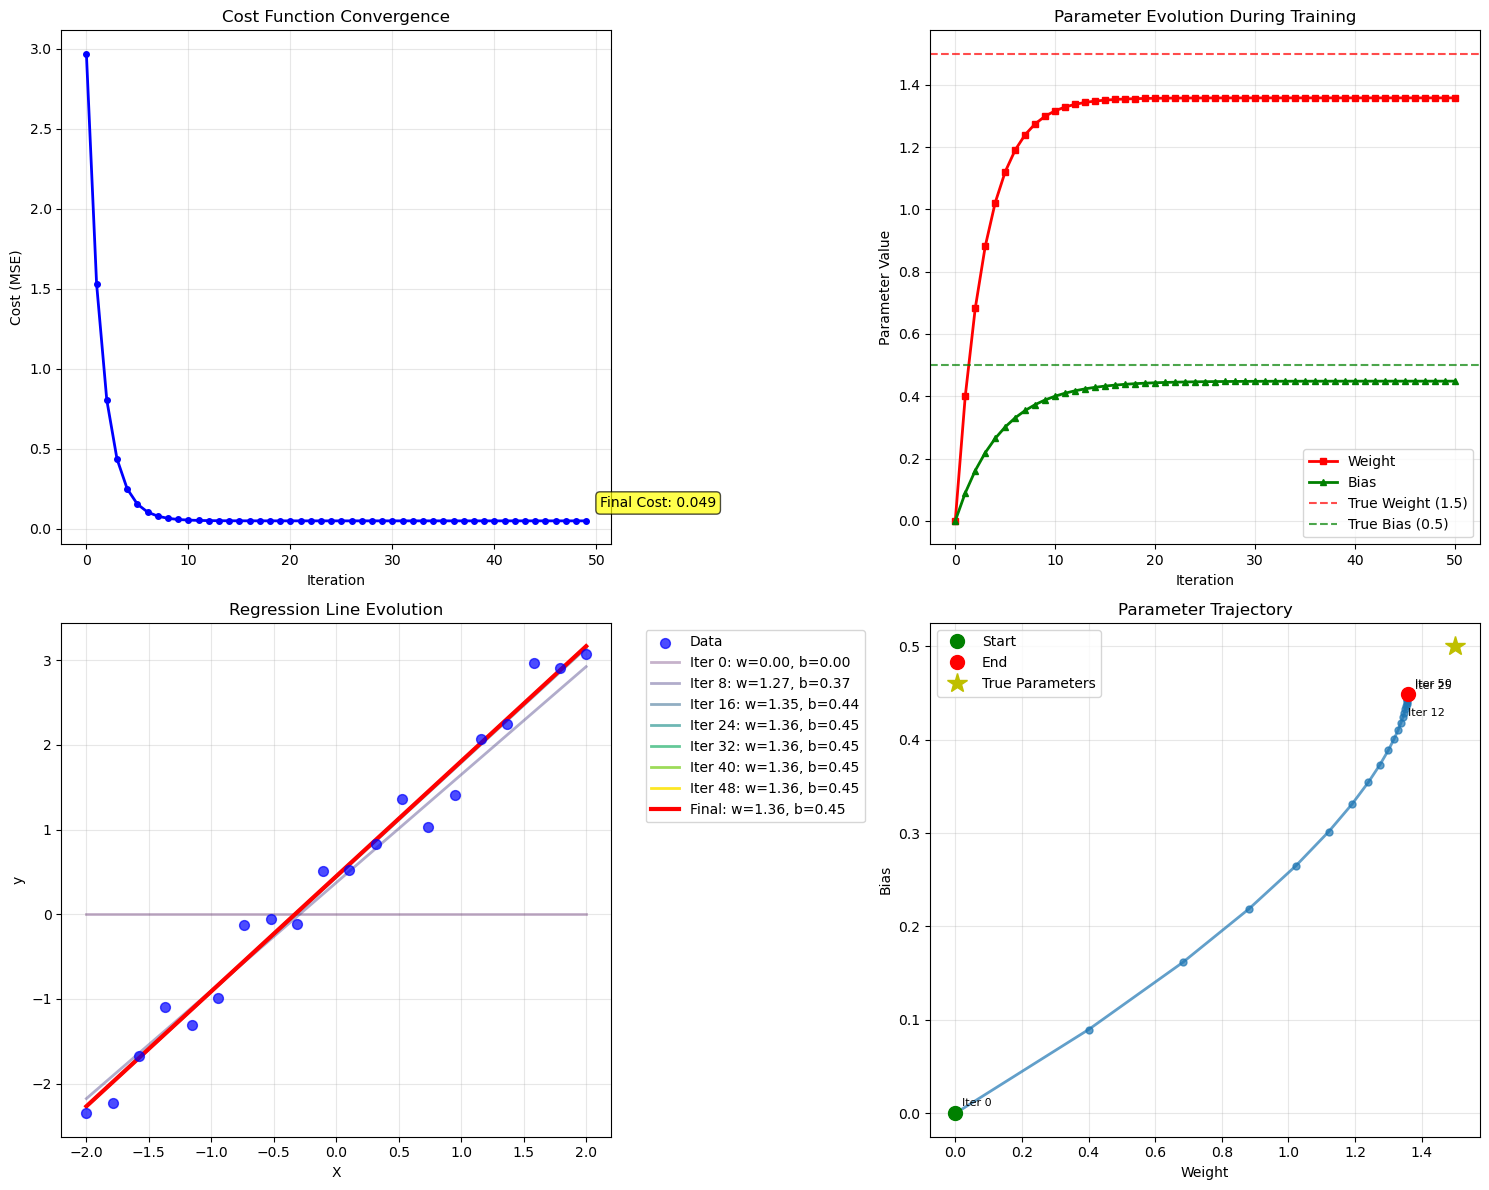

In [11]:
# Visualize the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Cost function convergence
axes[0, 0].plot(range(len(model.cost_history)), model.cost_history, 'b-', linewidth=2, marker='o', markersize=4)
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Cost (MSE)')
axes[0, 0].set_title('Cost Function Convergence')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].annotate(f'Final Cost: {model.cost_history[-1]:.3f}', 
                   xy=(len(model.cost_history)-1, model.cost_history[-1]), 
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# 2. Parameter evolution
iterations = range(len(model.weight_history))
axes[0, 1].plot(iterations, model.weight_history, 'r-', linewidth=2, marker='s', markersize=4, label='Weight')
axes[0, 1].plot(iterations, model.bias_history, 'g-', linewidth=2, marker='^', markersize=4, label='Bias')
axes[0, 1].axhline(y=true_weight, color='r', linestyle='--', alpha=0.7, label=f'True Weight ({true_weight})')
axes[0, 1].axhline(y=true_bias, color='g', linestyle='--', alpha=0.7, label=f'True Bias ({true_bias})')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Parameter Value')
axes[0, 1].set_title('Parameter Evolution During Training')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Regression line evolution (show every 10th iteration)
axes[1, 0].scatter(X, y, alpha=0.7, s=50, color='blue', label='Data', zorder=5)
step_size = max(1, len(model.weight_history) // 6)  # Show about 6 lines
colors = plt.cm.viridis(np.linspace(0, 1, len(range(0, len(model.weight_history), step_size))))

for i, idx in enumerate(range(0, len(model.weight_history), step_size)):
    w, b = model.weight_history[idx], model.bias_history[idx]
    y_line = w * X.flatten() + b
    alpha = 0.3 + 0.7 * (i / (len(range(0, len(model.weight_history), step_size)) - 1))
    axes[1, 0].plot(X, y_line, color=colors[i], alpha=alpha, linewidth=2, 
                   label=f'Iter {idx}: w={w:.2f}, b={b:.2f}')

# Plot final line prominently
final_pred = model.predict(X)
axes[1, 0].plot(X, final_pred, 'red', linewidth=3, label=f'Final: w={model.weight:.2f}, b={model.bias:.2f}')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_title('Regression Line Evolution')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# 4. Parameter trajectory in 2D space
axes[1, 1].plot(model.weight_history, model.bias_history, 'o-', linewidth=2, markersize=5, alpha=0.7)
axes[1, 1].plot(model.weight_history[0], model.bias_history[0], 'go', markersize=10, label='Start')
axes[1, 1].plot(model.weight_history[-1], model.bias_history[-1], 'ro', markersize=10, label='End')
axes[1, 1].plot(true_weight, true_bias, 'y*', markersize=15, label='True Parameters')
axes[1, 1].set_xlabel('Weight')
axes[1, 1].set_ylabel('Bias')
axes[1, 1].set_title('Parameter Trajectory')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Add iteration annotations for key points
for i in [0, len(model.weight_history)//4, len(model.weight_history)//2, -1]:
    axes[1, 1].annotate(f'Iter {i if i >= 0 else len(model.weight_history)-1}', 
                       xy=(model.weight_history[i], model.bias_history[i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

Creating 3D cost function surface...


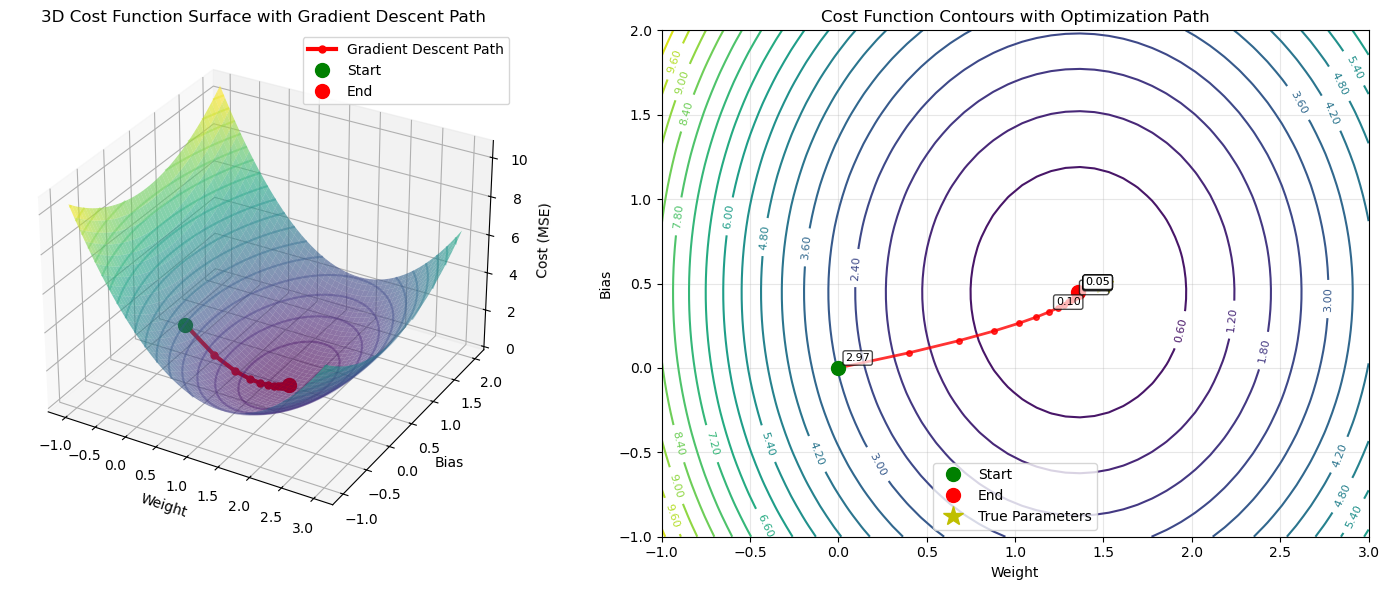

In [12]:
# Create 3D visualization of the cost function surface
print("Creating 3D cost function surface...")

# Define parameter ranges for surface plot
weight_range = np.linspace(-1, 3, 50)
bias_range = np.linspace(-1, 2, 50)

# Compute cost surface
W, B, costs = model.compute_cost_surface(X, y, weight_range, bias_range)

# Create 3D plot
fig = plt.figure(figsize=(15, 6))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surface = ax1.plot_surface(W, B, costs, alpha=0.6, cmap='viridis')
ax1.contour(W, B, costs, levels=20, alpha=0.4, cmap='viridis')

# Plot the optimization path
# Ensure all arrays have the same length for the path
path_length = min(len(model.weight_history), len(model.bias_history), len(model.cost_history))
weight_path = model.weight_history[:path_length]
bias_path = model.bias_history[:path_length] 
cost_path = model.cost_history[:path_length]

ax1.plot(weight_path, bias_path, cost_path, 
         'r-o', linewidth=3, markersize=5, label='Gradient Descent Path')
ax1.plot([weight_path[0]], [bias_path[0]], [cost_path[0]], 
         'go', markersize=10, label='Start')
ax1.plot([weight_path[-1]], [bias_path[-1]], [cost_path[-1]], 
         'ro', markersize=10, label='End')

ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Cost (MSE)')
ax1.set_title('3D Cost Function Surface with Gradient Descent Path')
ax1.legend()

# 2D contour plot with path
ax2 = fig.add_subplot(122)
contour = ax2.contour(W, B, costs, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8, fmt='%.2f')

# Plot optimization path  
# Use the same synchronized arrays for 2D plot
ax2.plot(weight_path, bias_path, 'r-o', linewidth=2, markersize=4, alpha=0.8)
ax2.plot(weight_path[0], bias_path[0], 'go', markersize=10, label='Start')
ax2.plot(weight_path[-1], bias_path[-1], 'ro', markersize=10, label='End')
ax2.plot(true_weight, true_bias, 'y*', markersize=15, label='True Parameters')

# Add cost values along the path
step_size = max(1, len(weight_path) // 8)
for i in range(0, len(weight_path), step_size):
    ax2.annotate(f'{cost_path[i]:.2f}', 
                xy=(weight_path[i], bias_path[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_title('Cost Function Contours with Optimization Path')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Detailed analysis of specific iterations
print("=== DETAILED ITERATION ANALYSIS ===\n")

# Show key iterations in detail
key_iterations = [0, 1, 5, 10, 25, len(model.cost_history)-1]

for i, iter_idx in enumerate(key_iterations):
    if iter_idx < len(model.cost_history):
        print(f"Iteration {iter_idx}:")
        print(f"  Weight: {model.weight_history[iter_idx]:.4f}")
        print(f"  Bias: {model.bias_history[iter_idx]:.4f}")
        print(f"  Cost: {model.cost_history[iter_idx]:.4f}")
        
        if iter_idx > 0:
            cost_change = model.cost_history[iter_idx] - model.cost_history[iter_idx-1]
            print(f"  Cost Change: {cost_change:.4f}")
            
            # Gradient information
            if iter_idx-1 < len(model.gradient_history):
                dw, db = model.gradient_history[iter_idx-1]
                print(f"  Gradients: dw={dw:.4f}, db={db:.4f}")
        print()

# Summary statistics
print("=== OPTIMIZATION SUMMARY ===")
print(f"Total iterations: {len(model.cost_history)}")
print(f"Initial cost: {model.cost_history[0]:.4f}")
print(f"Final cost: {model.cost_history[-1]:.4f}")
print(f"Cost reduction: {model.cost_history[0] - model.cost_history[-1]:.4f} ({100*(model.cost_history[0] - model.cost_history[-1])/model.cost_history[0]:.1f}%)")
print(f"Final parameters: weight={model.weight:.4f}, bias={model.bias:.4f}")
print(f"True parameters: weight={true_weight:.4f}, bias={true_bias:.4f}")
print(f"Parameter errors: weight_error={abs(model.weight - true_weight):.4f}, bias_error={abs(model.bias - true_bias):.4f}")

# Convergence analysis
cost_changes = [model.cost_history[i+1] - model.cost_history[i] for i in range(len(model.cost_history)-1)]
print(f"Average cost change per iteration: {np.mean(cost_changes):.6f}")
print(f"Final cost change: {cost_changes[-1]:.6f}")

# Check if converged (small cost change)
convergence_threshold = 1e-6
converged = abs(cost_changes[-1]) < convergence_threshold
print(f"Converged (threshold={convergence_threshold}): {converged}")

=== DETAILED ITERATION ANALYSIS ===

Iteration 0:
  Weight: 0.0000
  Bias: 0.0000
  Cost: 2.9686

Iteration 1:
  Weight: 0.4003
  Bias: 0.0897
  Cost: 1.5300
  Cost Change: -1.4386
  Gradients: dw=-4.0029, db=-0.8972

Iteration 5:
  Weight: 1.1211
  Bias: 0.3016
  Cost: 0.1535
  Cost Change: -0.0958
  Gradients: dw=-0.9903, db=-0.3675

Iteration 10:
  Weight: 1.3168
  Bias: 0.4004
  Cost: 0.0540
  Cost Change: -0.0039
  Gradients: dw=-0.1728, db=-0.1204

Iteration 25:
  Weight: 1.3579
  Bias: 0.4469
  Cost: 0.0491
  Cost Change: -0.0000
  Gradients: dw=-0.0009, db=-0.0042

Iteration 49:
  Weight: 1.3581
  Bias: 0.4486
  Cost: 0.0491
  Cost Change: -0.0000
  Gradients: dw=-0.0000, db=-0.0000

=== OPTIMIZATION SUMMARY ===
Total iterations: 50
Initial cost: 2.9686
Final cost: 0.0491
Cost reduction: 2.9194 (98.3%)
Final parameters: weight=1.3581, bias=0.4486
True parameters: weight=1.5000, bias=0.5000
Parameter errors: weight_error=0.1419, bias_error=0.0514
Average cost change per iteratio

=== LEARNING RATE COMPARISON ===

Training with learning rate: 0.01
Starting gradient descent...
Initial: weight=0.000, bias=0.000
Iteration 10: weight=0.351, bias=0.082, cost=1.775
Iteration 20: weight=0.612, bias=0.149, cost=1.015
Iteration 30: weight=0.805, bias=0.204, cost=0.591
Iteration 40: weight=0.948, bias=0.249, cost=0.354
Iteration 50: weight=1.054, bias=0.285, cost=0.222
Final: weight=1.054, bias=0.285, cost=0.222

Training with learning rate: 0.05
Starting gradient descent...
Initial: weight=0.000, bias=0.000
Iteration 10: weight=1.082, bias=0.292, cost=0.234
Iteration 20: weight=1.302, bias=0.394, cost=0.059
Iteration 30: weight=1.347, bias=0.430, cost=0.050
Iteration 40: weight=1.356, bias=0.442, cost=0.049
Iteration 50: weight=1.358, bias=0.446, cost=0.049
Final: weight=1.358, bias=0.446, cost=0.049

Training with learning rate: 0.1
Starting gradient descent...
Initial: weight=0.000, bias=0.000
Iteration 10: weight=1.317, bias=0.400, cost=0.058
Iteration 20: weight=1.35

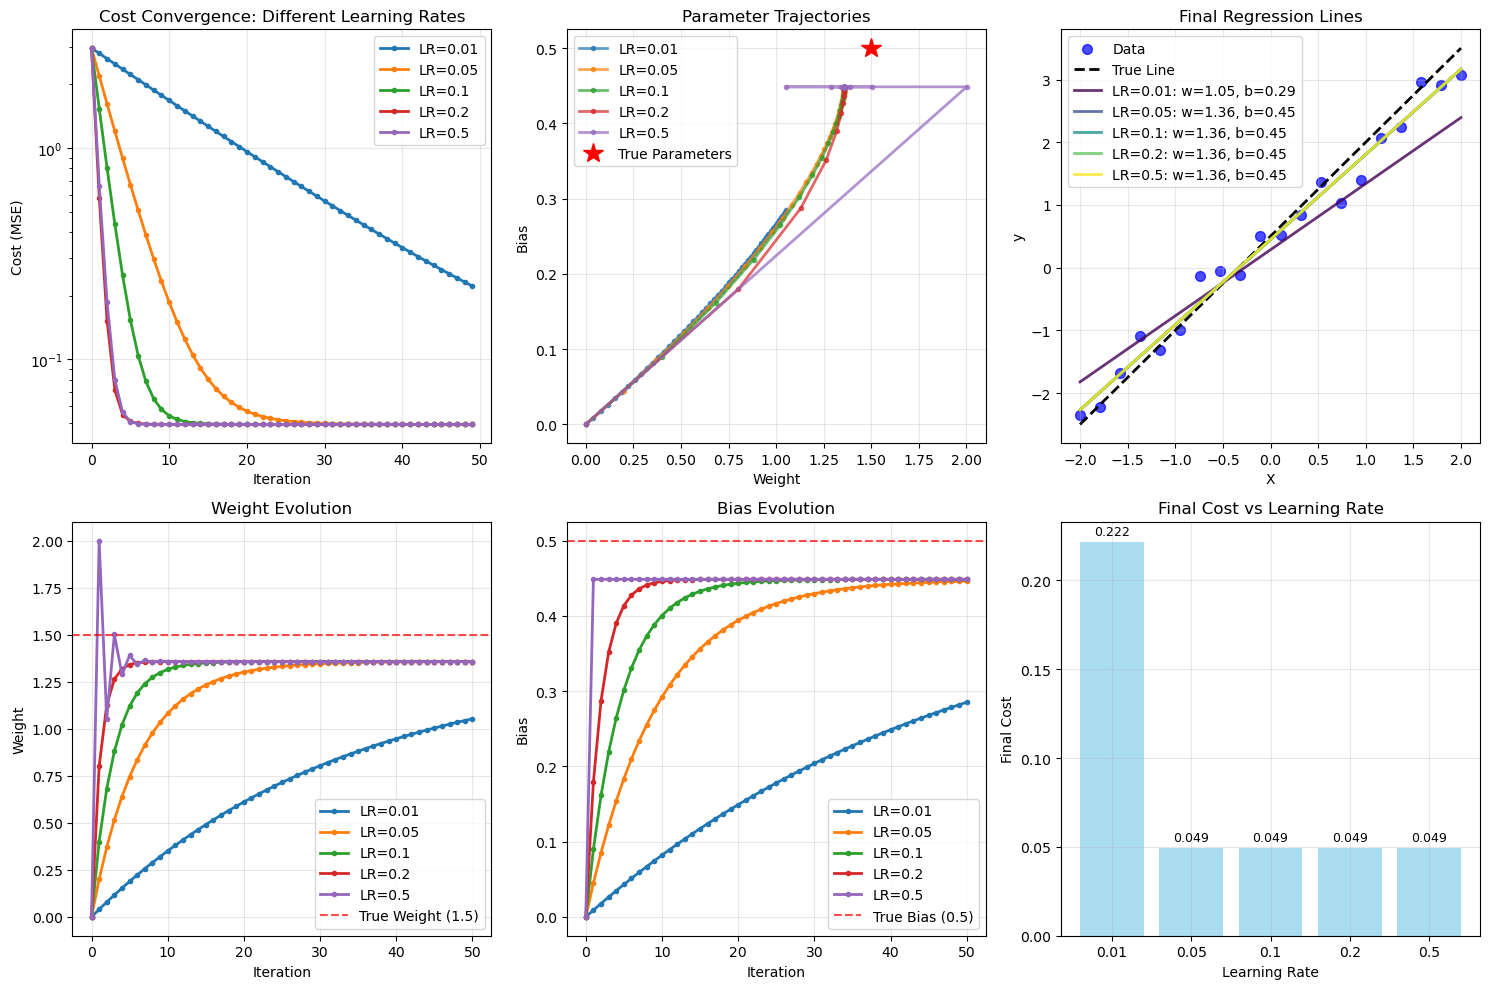


=== LEARNING RATE COMPARISON SUMMARY ===
LR     Final Cost   Iterations   Weight Error  Bias Error
-----------------------------------------------------------------
0.01   0.2218       50           0.4462        0.2148
0.05   0.0491       50           0.1423        0.0537
0.1    0.0491       50           0.1419        0.0514
0.2    0.0491       50           0.1419        0.0514
0.5    0.0491       50           0.1419        0.0514


In [14]:
# Compare different learning rates
print("=== LEARNING RATE COMPARISON ===")

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
models = {}

plt.figure(figsize=(15, 10))

# Train models with different learning rates
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model_lr = LinearRegressionGradientDescent(learning_rate=lr, max_iterations=50)
    model_lr.fit(X, y, initial_weight=0.0, initial_bias=0.0)
    models[lr] = model_lr

# Plot 1: Cost convergence comparison
plt.subplot(2, 3, 1)
for lr, model_lr in models.items():
    plt.plot(range(len(model_lr.cost_history)), model_lr.cost_history, 
             linewidth=2, marker='o', markersize=3, label=f'LR={lr}')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Convergence: Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to see differences better

# Plot 2: Parameter trajectories
plt.subplot(2, 3, 2)
for lr, model_lr in models.items():
    plt.plot(model_lr.weight_history, model_lr.bias_history, 
             'o-', linewidth=2, markersize=3, alpha=0.7, label=f'LR={lr}')
plt.plot(true_weight, true_bias, 'r*', markersize=15, label='True Parameters')
plt.xlabel('Weight')
plt.ylabel('Bias')
plt.title('Parameter Trajectories')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Final regression lines
plt.subplot(2, 3, 3)
plt.scatter(X, y, alpha=0.7, s=50, color='blue', label='Data')
plt.plot(X, true_weight * X.flatten() + true_bias, 'k--', linewidth=2, label='True Line')

colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))
for i, (lr, model_lr) in enumerate(models.items()):
    final_pred = model_lr.predict(X)
    plt.plot(X, final_pred, color=colors[i], linewidth=2, alpha=0.8, 
             label=f'LR={lr}: w={model_lr.weight:.2f}, b={model_lr.bias:.2f}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Regression Lines')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Weight evolution
plt.subplot(2, 3, 4)
for lr, model_lr in models.items():
    plt.plot(range(len(model_lr.weight_history)), model_lr.weight_history, 
             linewidth=2, marker='o', markersize=3, label=f'LR={lr}')
plt.axhline(y=true_weight, color='r', linestyle='--', alpha=0.7, label=f'True Weight ({true_weight})')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weight Evolution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Bias evolution
plt.subplot(2, 3, 5)
for lr, model_lr in models.items():
    plt.plot(range(len(model_lr.bias_history)), model_lr.bias_history, 
             linewidth=2, marker='o', markersize=3, label=f'LR={lr}')
plt.axhline(y=true_bias, color='r', linestyle='--', alpha=0.7, label=f'True Bias ({true_bias})')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.title('Bias Evolution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Final errors
plt.subplot(2, 3, 6)
final_errors = []
for lr, model_lr in models.items():
    final_error = model_lr.cost_history[-1]
    final_errors.append(final_error)

plt.bar([str(lr) for lr in learning_rates], final_errors, alpha=0.7, color='skyblue')
plt.xlabel('Learning Rate')
plt.ylabel('Final Cost')
plt.title('Final Cost vs Learning Rate')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (lr, error) in enumerate(zip(learning_rates, final_errors)):
    plt.text(i, error + max(final_errors)*0.01, f'{error:.3f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Summary table
print("\n=== LEARNING RATE COMPARISON SUMMARY ===")
print(f"{'LR':<6} {'Final Cost':<12} {'Iterations':<12} {'Weight Error':<13} {'Bias Error'}")
print("-" * 65)
for lr, model_lr in models.items():
    final_cost = model_lr.cost_history[-1]
    iterations = len(model_lr.cost_history)
    weight_error = abs(model_lr.weight - true_weight)
    bias_error = abs(model_lr.bias - true_bias)
    print(f"{lr:<6} {final_cost:<12.4f} {iterations:<12} {weight_error:<13.4f} {bias_error:.4f}")

## Key Takeaways: Understanding Gradient Descent

### What We Learned:

1. **Iterative Optimization**: Gradient descent finds optimal parameters through small, repeated steps
2. **Cost Function Landscape**: The algorithm navigates a 3D surface to find the minimum
3. **Learning Rate Impact**: 
   - **Too small**: Slow convergence, many iterations needed
   - **Too large**: Potential overshooting, unstable training
   - **Just right**: Efficient convergence to optimal solution

### Visual Insights:

- **Parameter Evolution**: Watch how weights and bias gradually approach true values
- **Cost Convergence**: Cost decreases rapidly at first, then plateaus near minimum
- **3D Surface**: The bowl-shaped cost function has a clear global minimum
- **Optimization Path**: Algorithm follows steepest descent down the cost surface

### Mathematical Foundation:

The gradient descent update rules we implemented:
- **Weight update**: `w = w - learning_rate * ∂cost/∂w`
- **Bias update**: `b = b - learning_rate * ∂cost/∂b`

Where the gradients are:
- `∂cost/∂w = (2/n) * Σ(prediction - actual) * x`
- `∂cost/∂b = (2/n) * Σ(prediction - actual)`

### Practical Considerations:

1. **Convergence**: Monitor cost changes to detect when optimization is complete
2. **Learning Rate Selection**: Start with 0.1 and adjust based on convergence behavior
3. **Initialization**: Starting point affects convergence speed but not final result (for convex problems)
4. **Iteration Count**: Balance between computational cost and convergence accuracy

This visualization helps build intuition for more complex algorithms like neural network training!

## Advanced: Non-Convex Optimization with Local Minima

Now let's explore what happens when the cost function has **multiple minima**. Unlike linear regression (which has a convex cost function with one global minimum), many real-world problems have non-convex landscapes with local minima where gradient descent can get "trapped".

In [15]:
# Create a non-convex cost function with local and global minima
def non_convex_cost_function(w, b):
    """
    A non-convex function with multiple minima to demonstrate local vs global optimization.
    This function has:
    - Global minimum around (2.0, 1.0)
    - Local minimum around (-1.0, -0.5)
    """
    # Base quadratic term (creates the global minimum)
    base_cost = 0.5 * ((w - 2.0)**2 + (b - 1.0)**2)
    
    # Add sinusoidal terms to create local minima
    local_minima = 2.0 * np.exp(-((w + 1.0)**2 + (b + 0.5)**2) / 0.5) * np.cos(3 * w) * np.cos(3 * b)
    
    # Add some noise/complexity
    complexity = 0.3 * np.sin(2 * w) * np.sin(2 * b)
    
    return base_cost - local_minima + complexity + 1.0  # +1 to keep positive

def compute_gradients_non_convex(w, b):
    """Compute gradients of the non-convex function."""
    h = 1e-5  # Small step for numerical differentiation
    dw = (non_convex_cost_function(w + h, b) - non_convex_cost_function(w - h, b)) / (2 * h)
    db = (non_convex_cost_function(w, b + h) - non_convex_cost_function(w, b - h)) / (2 * h)
    return dw, db

class NonConvexGradientDescent:
    """Gradient descent for non-convex optimization."""
    
    def __init__(self, learning_rate=0.05, max_iterations=200):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
    def optimize(self, start_w, start_b):
        """Run gradient descent from given starting point."""
        w, b = start_w, start_b
        w_history = [w]
        b_history = [b]
        cost_history = [non_convex_cost_function(w, b)]
        
        for i in range(self.max_iterations):
            # Compute gradients
            dw, db = compute_gradients_non_convex(w, b)
            
            # Update parameters
            w -= self.learning_rate * dw
            b -= self.learning_rate * db
            
            # Store history
            w_history.append(w)
            b_history.append(b)
            cost_history.append(non_convex_cost_function(w, b))
            
            # Early stopping if gradients are very small
            if abs(dw) < 1e-6 and abs(db) < 1e-6:
                break
                
        return w_history, b_history, cost_history

# Create the cost surface
w_range = np.linspace(-3, 4, 100)
b_range = np.linspace(-2, 3, 100)
W_nc, B_nc = np.meshgrid(w_range, b_range)
costs_nc = np.zeros_like(W_nc)

print("Computing non-convex cost surface...")
for i in range(W_nc.shape[0]):
    for j in range(W_nc.shape[1]):
        costs_nc[i, j] = non_convex_cost_function(W_nc[i, j], B_nc[i, j])

print("Cost surface computed!")

# Test multiple starting points
starting_points = [
    (-2.5, -1.5, "Point A: Far from global min"),
    (-0.5, -0.2, "Point B: Near local min"), 
    (1.5, 0.5, "Point C: Near global min"),
    (0.5, 2.0, "Point D: Middle region"),
    (-1.8, 1.5, "Point E: Complex region")
]

# Run gradient descent from different starting points
optimizer = NonConvexGradientDescent(learning_rate=0.05, max_iterations=200)
results = {}

print("\n=== RUNNING GRADIENT DESCENT FROM DIFFERENT STARTING POINTS ===")
for start_w, start_b, label in starting_points:
    print(f"\n{label}: Starting at ({start_w:.1f}, {start_b:.1f})")
    w_hist, b_hist, cost_hist = optimizer.optimize(start_w, start_b)
    
    final_w, final_b = w_hist[-1], b_hist[-1]
    final_cost = cost_hist[-1]
    
    print(f"  Final point: ({final_w:.3f}, {final_b:.3f})")
    print(f"  Final cost: {final_cost:.3f}")
    print(f"  Iterations: {len(cost_hist)-1}")
    
    results[label] = {
        'w_history': w_hist,
        'b_history': b_hist,
        'cost_history': cost_hist,
        'start': (start_w, start_b),
        'end': (final_w, final_b)
    }

Computing non-convex cost surface...
Cost surface computed!

=== RUNNING GRADIENT DESCENT FROM DIFFERENT STARTING POINTS ===

Point A: Far from global min: Starting at (-2.5, -1.5)
  Final point: (-0.804, -0.769)
  Final cost: 5.993
  Iterations: 76

Point B: Near local min: Starting at (-0.5, -0.2)
  Final point: (2.191, 0.886)
  Final cost: 0.747
  Iterations: 158

Point C: Near global min: Starting at (1.5, 0.5)
  Final point: (2.191, 0.886)
  Final cost: 0.747
  Iterations: 129

Point D: Middle region: Starting at (0.5, 2.0)
  Final point: (2.191, 0.886)
  Final cost: 0.747
  Iterations: 166

Point E: Complex region: Starting at (-1.8, 1.5)
  Final point: (2.191, 0.886)
  Final cost: 0.747
  Iterations: 176


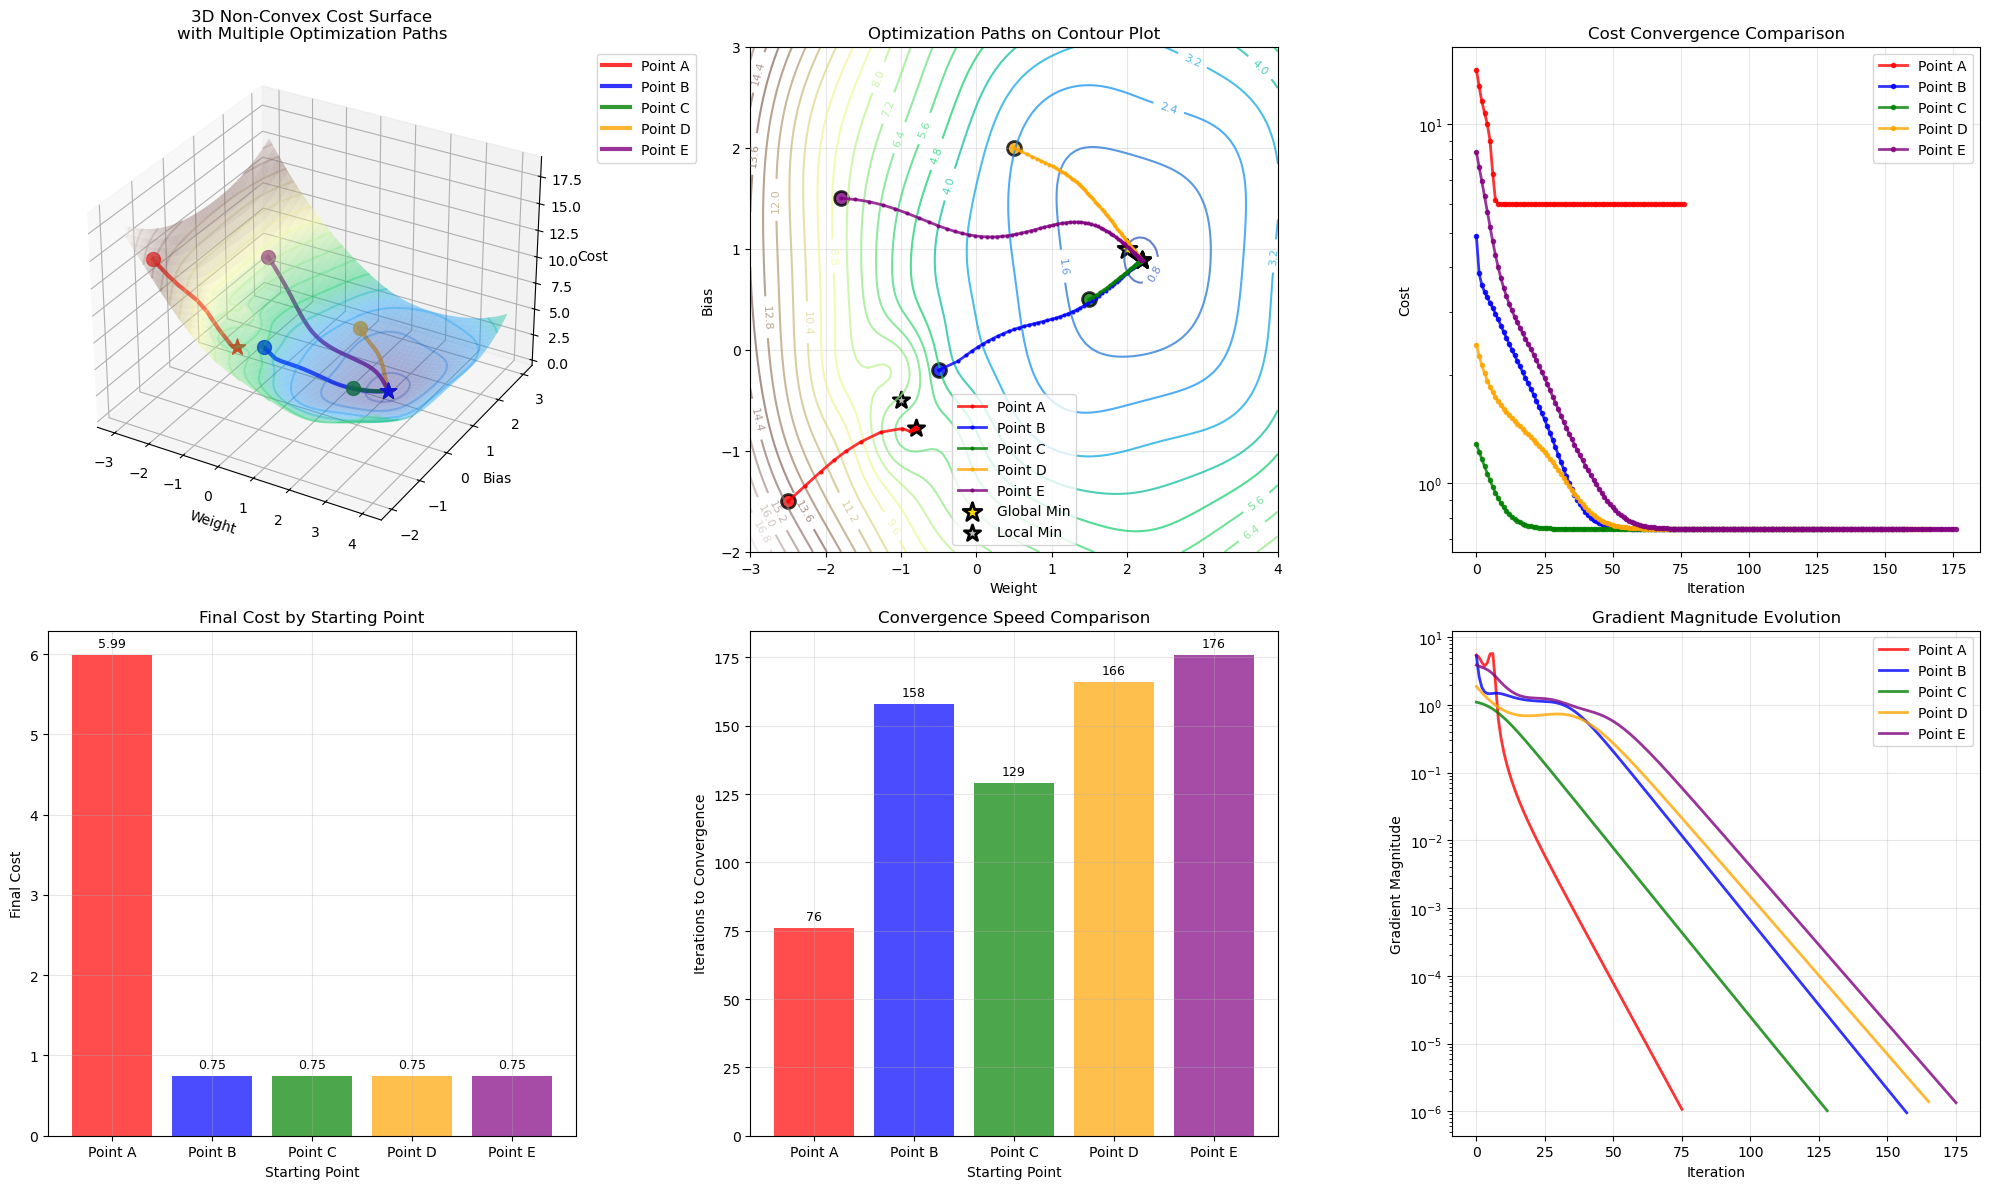


DETAILED ANALYSIS: LOCAL vs GLOBAL MINIMA

Point A: Far from global min:
  Final position: (-0.804, -0.769)
  Final cost: 5.993
  Converged to: LOCAL MINIMUM
  Iterations: 76

Point B: Near local min:
  Final position: (2.191, 0.886)
  Final cost: 0.747
  Converged to: GLOBAL MINIMUM
  Iterations: 158

Point C: Near global min:
  Final position: (2.191, 0.886)
  Final cost: 0.747
  Converged to: GLOBAL MINIMUM
  Iterations: 129

Point D: Middle region:
  Final position: (2.191, 0.886)
  Final cost: 0.747
  Converged to: GLOBAL MINIMUM
  Iterations: 166

Point E: Complex region:
  Final position: (2.191, 0.886)
  Final cost: 0.747
  Converged to: GLOBAL MINIMUM
  Iterations: 176

KEY INSIGHTS:
1. STARTING POINT MATTERS: Different starting points lead to different minima
2. LOCAL TRAPS: Some paths get stuck in local minima (higher cost)
3. GLOBAL SUCCESS: Points starting near the global basin find the best solution
4. NO GUARANTEE: Gradient descent cannot guarantee finding the global mi

In [20]:
# Create comprehensive visualization of non-convex optimization
fig = plt.figure(figsize=(20, 12))

# 1. 3D Surface with all optimization paths
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
surface = ax1.plot_surface(W_nc, B_nc, costs_nc, alpha=0.4, cmap='terrain', linewidth=0, antialiased=True)
ax1.contour(W_nc, B_nc, costs_nc, levels=20, alpha=0.3, cmap='terrain')

# Plot all optimization paths in 3D
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (label, result) in enumerate(results.items()):
    w_hist = result['w_history']
    b_hist = result['b_history'] 
    cost_hist = result['cost_history']
    
    # Plot the path
    ax1.plot(w_hist, b_hist, cost_hist, color=colors[i], linewidth=3, alpha=0.8, label=label.split(':')[0])
    
    # Mark start and end points
    ax1.scatter([w_hist[0]], [b_hist[0]], [cost_hist[0]], color=colors[i], s=100, marker='o', alpha=0.8)
    ax1.scatter([w_hist[-1]], [b_hist[-1]], [cost_hist[-1]], color=colors[i], s=150, marker='*', alpha=1.0)

ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Cost')
ax1.set_title('3D Non-Convex Cost Surface\nwith Multiple Optimization Paths')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. 2D Contour plot with paths
ax2 = fig.add_subplot(2, 3, 2)
contour = ax2.contour(W_nc, B_nc, costs_nc, levels=25, cmap='terrain', alpha=0.7)
ax2.clabel(contour, inline=True, fontsize=8, fmt='%.1f')

for i, (label, result) in enumerate(results.items()):
    w_hist = result['w_history']
    b_hist = result['b_history']
    
    # Plot the path
    ax2.plot(w_hist, b_hist, color=colors[i], linewidth=2, alpha=0.8, marker='o', markersize=2, label=label.split(':')[0])
    
    # Mark start and end points
    ax2.scatter(w_hist[0], b_hist[0], color=colors[i], s=100, marker='o', alpha=0.8, edgecolor='black', linewidth=2)
    ax2.scatter(w_hist[-1], b_hist[-1], color=colors[i], s=150, marker='*', alpha=1.0, edgecolor='black', linewidth=2)

# Mark approximate minima locations
ax2.scatter(2.0, 1.0, color='gold', s=200, marker='*', alpha=1.0, edgecolor='black', linewidth=2, label='Global Min')
ax2.scatter(-1.0, -0.5, color='silver', s=150, marker='*', alpha=1.0, edgecolor='black', linewidth=2, label='Local Min')

ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_title('Optimization Paths on Contour Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Cost convergence for all paths
ax3 = fig.add_subplot(2, 3, 3)
for i, (label, result) in enumerate(results.items()):
    cost_hist = result['cost_history']
    ax3.plot(range(len(cost_hist)), cost_hist, color=colors[i], linewidth=2, marker='o', markersize=3, 
             alpha=0.8, label=label.split(':')[0])

ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost')
ax3.set_title('Cost Convergence Comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')  # Log scale to see differences better

# 4. Final positions comparison
ax4 = fig.add_subplot(2, 3, 4)
final_costs = []
labels_short = []
for i, (label, result) in enumerate(results.items()):
    final_cost = result['cost_history'][-1]
    final_costs.append(final_cost)
    labels_short.append(label.split(':')[0])

bars = ax4.bar(labels_short, final_costs, color=colors[:len(final_costs)], alpha=0.7)
ax4.set_xlabel('Starting Point')
ax4.set_ylabel('Final Cost')
ax4.set_title('Final Cost by Starting Point')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, cost in zip(bars, final_costs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + max(final_costs)*0.01, 
             f'{cost:.2f}', ha='center', va='bottom', fontsize=9)

# 5. Path lengths comparison
ax5 = fig.add_subplot(2, 3, 5)
path_lengths = []
for i, (label, result) in enumerate(results.items()):
    path_length = len(result['cost_history']) - 1
    path_lengths.append(path_length)

bars = ax5.bar(labels_short, path_lengths, color=colors[:len(path_lengths)], alpha=0.7)
ax5.set_xlabel('Starting Point')
ax5.set_ylabel('Iterations to Convergence')
ax5.set_title('Convergence Speed Comparison')
ax5.grid(True, alpha=0.3)

# Add value labels on bars
for bar, length in zip(bars, path_lengths):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + max(path_lengths)*0.01, 
             f'{length}', ha='center', va='bottom', fontsize=9)

# 6. Gradient magnitude evolution
ax6 = fig.add_subplot(2, 3, 6)
for i, (label, result) in enumerate(results.items()):
    w_hist = result['w_history']
    b_hist = result['b_history']
    
    # Compute gradient magnitudes
    grad_magnitudes = []
    for j in range(len(w_hist)-1):
        dw, db = compute_gradients_non_convex(w_hist[j], b_hist[j])
        grad_mag = np.sqrt(dw**2 + db**2)
        grad_magnitudes.append(grad_mag)
    
    ax6.plot(range(len(grad_magnitudes)), grad_magnitudes, color=colors[i], linewidth=2, 
             alpha=0.8, label=label.split(':')[0])

ax6.set_xlabel('Iteration')
ax6.set_ylabel('Gradient Magnitude')
ax6.set_title('Gradient Magnitude Evolution')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_yscale('log')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "="*80)
print("DETAILED ANALYSIS: LOCAL vs GLOBAL MINIMA")
print("="*80)

# Find which points ended up in global vs local minima
global_min_threshold = 1.5  # Approximate threshold to distinguish global from local

for label, result in results.items():
    final_cost = result['cost_history'][-1]
    final_pos = result['end']
    iterations = len(result['cost_history']) - 1
    
    if final_cost < global_min_threshold:
        min_type = "GLOBAL MINIMUM"
    else:
        min_type = "LOCAL MINIMUM"
    
    print(f"\n{label}:")
    print(f"  Final position: ({final_pos[0]:.3f}, {final_pos[1]:.3f})")
    print(f"  Final cost: {final_cost:.3f}")
    print(f"  Converged to: {min_type}")
    print(f"  Iterations: {iterations}")

print(f"\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
print("1. STARTING POINT MATTERS: Different starting points lead to different minima")
print("2. LOCAL TRAPS: Some paths get stuck in local minima (higher cost)")
print("3. GLOBAL SUCCESS: Points starting near the global basin find the best solution")
print("4. NO GUARANTEE: Gradient descent cannot guarantee finding the global minimum")
print("5. REAL-WORLD IMPACT: This is why neural networks use techniques like:")
print("   - Multiple random initializations")
print("   - Momentum and adaptive learning rates") 
print("   - Regularization and dropout")
print("   - Advanced optimizers (Adam, RMSprop, etc.)")
print("="*80)

## Comparison: Convex vs Non-Convex Optimization

### **Convex Optimization (Linear Regression)**
- ✅ **Single global minimum**: Only one optimal solution
- ✅ **Guaranteed convergence**: Any starting point leads to the same minimum
- ✅ **Predictable behavior**: Smooth "bowl" shape, easy to optimize
- ✅ **No local traps**: Gradient descent always finds the best solution

### **Non-Convex Optimization (Complex Landscapes)**
- ⚠️ **Multiple minima**: Local and global minima exist
- ⚠️ **Starting point dependency**: Different initializations → different solutions
- ⚠️ **Local traps**: Algorithm can get stuck in suboptimal solutions
- ⚠️ **No guarantees**: May not find the global optimum

### **Real-World Implications**

This is why **deep neural networks** (which have highly non-convex loss landscapes) use:

1. **Multiple Random Initializations**: Train several models and pick the best
2. **Advanced Optimizers**: Momentum, Adam, RMSprop to escape local minima
3. **Learning Rate Scheduling**: Adaptive rates to navigate complex landscapes
4. **Regularization**: Techniques to smooth the loss landscape
5. **Ensemble Methods**: Combine multiple models trained from different starting points

**Understanding these concepts is crucial for modern machine learning!**